# Testing LightGBM Using Titanic Dataset
Dataset: https://www.kaggle.com/c/titanic
Add feature explantations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("train.csv")
dataFeatures = data[[ 'Pclass', 'SibSp', 'Parch', 'Fare']]

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Creating Training Dataset - All numerical + Dummifying Categorical

No Dummies, No Dropping NaN

In [5]:
dataFeatures = data[['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex', 'Embarked']]

Categorical Columns Need to be defined as categorical

In [6]:
dataFeatures["Sex"] = dataFeatures["Sex"].astype('category');
dataFeatures["Embarked"] = dataFeatures["Embarked"].astype('category');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
yvalues = data['Survived']

There is a class imbalance

In [8]:
print(f"Class imbalance: Positives: {yvalues[yvalues==1].shape[0]} | Negative: {yvalues[yvalues==0].shape[0]}")
print(f"Predict All Negative Accuracy = {round(yvalues[yvalues==0].shape[0]/(yvalues[yvalues==1].shape[0] + yvalues[yvalues==0].shape[0]),2)}")

Class imbalance: Positives: 342 | Negative: 549
Predict All Negative Accuracy = 0.62


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(dataFeatures, yvalues, test_size = 0.2, random_state = 10)

In [10]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'], dtype='object')

## Using LightGBM For Classification

In [11]:
import lightgbm as lgb;

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [12]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [13]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'], dtype='object')

In [14]:
def objective(params):
    learning_rate = 10. ** params[0]
    num_leaves = params[1]
    n_estimators = params[2]
    
    lgbm = lgb.LGBMClassifier(
                        learning_rate=learning_rate,
                        num_leaves=num_leaves,
                        max_depth=8,
                        n_estimators=n_estimators,
                        verbose=1,
                        )
    
    return -np.mean(cross_val_score(lgbm, X_train, Y_train, cv=10, scoring='accuracy'))

Testing the function with arbitrary parameters

In [15]:
objective([-2.2380598356874204, 25, 207])

-0.8146322378716745

## Using Bayesian Optimization For Hyperparameter Tuning

In [16]:
from skopt import gp_minimize

In [17]:
space = [(-5.0,0.0),(2,100),(2,300)]

r = gp_minimize(objective, space, n_calls=150, random_state=0,n_jobs=-1,verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.4209
Function value obtained: -0.8090
Current minimum: -0.8090
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.7007
Function value obtained: -0.7808
Current minimum: -0.8090
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5101
Function value obtained: -0.8047
Current minimum: -0.8090
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 4.0806
Function value obtained: -0.7949
Current minimum: -0.8090
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.4913
Function value obtained: -0.6067
Current minimum: -0.8090
Iteration No: 6 started. 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 0.9397
Function value obtained: -0.7796
Current minimum: -0.8245
Iteration No: 42 started. Searching for the next optimal point.
Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 1.6265
Function value obtained: -0.7963
Current minimum: -0.8245
Iteration No: 43 started. Searching for the next optimal point.
Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 2.0464
Function value obtained: -0.8202
Current minimum: -0.8245
Iteration No: 44 started. Searching for the next optimal point.
Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 4.2338
Function value obtained: -0.8202
Current minimum: -0.8245
Iteration No: 45 started. Searching for the next optimal point.
Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 5.7805
Function value obtained: -0.8174
Current minimum: -0.8245
Iteration No: 46 st

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 1.5552
Function value obtained: -0.6067
Current minimum: -0.8245
Iteration No: 82 started. Searching for the next optimal point.
Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 2.2287
Function value obtained: -0.7991
Current minimum: -0.8245
Iteration No: 83 started. Searching for the next optimal point.
Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 2.9139
Function value obtained: -0.8160
Current minimum: -0.8245
Iteration No: 84 started. Searching for the next optimal point.
Iteration No: 84 ended. Search finished for the next optimal point.
Time taken: 6.8717
Function value obtained: -0.8160
Current minimum: -0.8245
Iteration No: 85 started. Searching for the next optimal point.
Iteration No: 85 ended. Search finished for the next optimal point.
Time taken: 3.4903
Function value obtained: -0.8146
Current minimum: -0.8245
Iteration No: 86 st

Iteration No: 120 ended. Search finished for the next optimal point.
Time taken: 5.5066
Function value obtained: -0.8188
Current minimum: -0.8245
Iteration No: 121 started. Searching for the next optimal point.
Iteration No: 121 ended. Search finished for the next optimal point.
Time taken: 9.1933
Function value obtained: -0.7977
Current minimum: -0.8245
Iteration No: 122 started. Searching for the next optimal point.
Iteration No: 122 ended. Search finished for the next optimal point.
Time taken: 5.4397
Function value obtained: -0.8160
Current minimum: -0.8245
Iteration No: 123 started. Searching for the next optimal point.
Iteration No: 123 ended. Search finished for the next optimal point.
Time taken: 6.2517
Function value obtained: -0.8216
Current minimum: -0.8245
Iteration No: 124 started. Searching for the next optimal point.
Iteration No: 124 ended. Search finished for the next optimal point.
Time taken: 7.2724
Function value obtained: -0.8245
Current minimum: -0.8245
Iteration 

In [18]:
best_params = r.x
best_params

[-2.1291404241284884, 36, 229]

In [19]:
r.fun

-0.8244522691705791

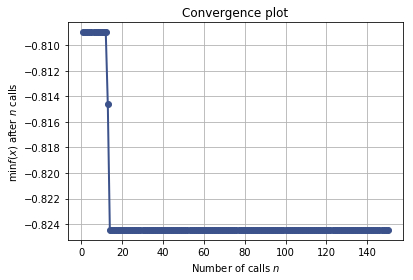

In [20]:
from skopt.plots import plot_convergence

plot_convergence(r);

## Move Parameters to Final LightGBM Model  

In [21]:
final_lgbm = lgb.LGBMClassifier(num_leaves=best_params[1],
                        learning_rate= 10 ** best_params[0],
                        n_estimators=best_params[2],
                        verbose=1)
    
final_lgbm.fit(X_train, Y_train)
Y_pred = final_lgbm.predict(X_test)

Y_pred[Y_pred > 0.5] = 1
Y_pred[Y_pred <= 0.5] = 0

accuracy_score(Y_pred,Y_test)

0.8435754189944135

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Y_true = Y_test
conf = confusion_matrix(Y_true, Y_pred)
tn, fp, fn, tp = conf.ravel()

print("LightGBM Results")

print(conf)

precision = (tp / (tp + fp))
recall = (tp / (tp + fn))
f1_score = 2*precision*recall/(precision + recall)

print ('\n')
print ("Accuracy:              %0.2f" % accuracy_score(Y_pred,Y_true))
print ("Precision:              %0.2f" % precision)
print ("Recall:                 %0.2f"% recall)
print ("F1 Score:               %0.4f"% f1_score)

LightGBM Results
[[105  12]
 [ 16  46]]


Accuracy:              0.84
Precision:              0.79
Recall:                 0.74
F1 Score:               0.7667


In [23]:
best_params = r.x
best_params

[-2.1291404241284884, 36, 229]

## Submit To Kaggle For Real Test Data

In [24]:
data_test = pd.read_csv("test.csv")

In [25]:
X_submit = data_test[['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex','Embarked']]


In [26]:
X_submit["Sex"] = X_submit["Sex"].astype('category');
X_submit["Embarked"] = X_submit["Embarked"].astype('category');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
print("Checking Feature Positins In Training vs Test data")
print(X_train.columns)
print(X_submit.columns)
print(False in (X_train.columns == X_submit.columns))
data_test.shape

Checking Feature Positins In Training vs Test data
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'], dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'], dtype='object')
False


(418, 11)

In [28]:
Y_lgbm_submit = final_lgbm.predict(X_submit)
Y_lgbm_submit[Y_lgbm_submit > 0.5] = 1
Y_lgbm_submit[Y_lgbm_submit <= 0.5] = 0

In [29]:
lgbm_submit = pd.DataFrame(list(zip(data_test['PassengerId'],Y_lgbm_submit)),columns=['PassengerId','Survived'])

In [30]:
lgbm_submit.to_csv("lgbm_submit.csv",index=False)

# FINAL RESULT

## LightGBM w AutoTuning

![lr](lgbm_titanic_6123.png)

# Thank You!